<a href="https://colab.research.google.com/github/RoshaanK20/Prediction-Model-/blob/main/Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
from google.colab import files
import pandas as pd

uploaded = files.upload()
csv_path = list(uploaded.keys())[0]
df = pd.read_csv(csv_path)
print("✅ Data loaded successfully!")
df.head()

Saving AI_merit.csv to AI_merit.csv
✅ Data loaded successfully!


,Name,FatherName,ID,Degree,Department,Semester,HSC%,Cgpa,Status
0,SaddamUmer,SultanUmer,BAI-22F-026,BS(Hons),ArtificialInt,3,64.63,3.55,Selected
1,MuhammadTabishAla,mSyedGoharAlam,BAI-23S-065,BS(Hons),ArtificialInt,3,54.99,3.51,Selected
2,HaiderRajput,AdnanShahid,BAI-22F-015,BS(Hons),ArtificialInt,3,65.00,3.47,Selected
3,Haya,Ameer Hussain,BAI-23S-071,BS(Hons),ArtificialInt,3,74.91,3.44,Selected
4,AnushahSalman,SalmanZia,BAI-23S-015,BS(Hons),ArtificialInt,3,68.18,3.42,Selected


# ***🧱 Step 1 — Load and Inspect Data***

In [52]:
import pandas as pd

# Load your cleaned AI merit list
file_path = "/content/AI_merit.csv"
df = pd.read_csv(file_path)

print("✅ Data loaded successfully!")
print("Shape:", df.shape)
df.head(10)

✅ Data loaded successfully!
Shape: (159, 9)


,Name,FatherName,ID,Degree,Department,Semester,HSC%,Cgpa,Status
0,SaddamUmer,SultanUmer,BAI-22F-026,BS(Hons),ArtificialInt,3,64.63,3.55,Selected
1,MuhammadTabishAla,mSyedGoharAlam,BAI-23S-065,BS(Hons),ArtificialInt,3,54.99,3.51,Selected
2,HaiderRajput,AdnanShahid,BAI-22F-015,BS(Hons),ArtificialInt,3,65.00,3.47,Selected
3,Haya,Ameer Hussain,BAI-23S-071,BS(Hons),ArtificialInt,3,74.91,3.44,Selected
4,AnushahSalman,SalmanZia,BAI-23S-015,BS(Hons),ArtificialInt,3,68.18,3.42,Selected
5,SheikhAbdulRehman,KhalidSharif,BAI-22F-028,BS(Hons),ArtificialInt,3,60.00,3.42,Selected
6,AbdullahSoomro,Sikandar Ali,BAI-22F-034,BS(Hons),ArtificialInt,3,56.64,3.39,Selected
7,AliZaib,IrshadAli,BAI-22F-022,BS(Hons),ArtificialInt,3,78.56,3.33,Waiting
8,EshaQureshi,DawoodAhmed,BAI-22F-014,BS(Hons),ArtificialInt,3,62.55,3.30,Waiting
9,UmeAmmara,MuhammadAsif,BAI-23S-078,BS(Hons),ArtificialInt,3,52.53,3.25,Waiting


# ***🧹 Step 2 — Basic Cleaning***

In [53]:
# Convert numeric columns properly
df["HSC%"] = pd.to_numeric(df["HSC%"], errors="coerce")
df["Cgpa"] = pd.to_numeric(df["Cgpa"], errors="coerce")

# Drop rows with missing essential values
df = df.dropna(subset=["HSC%", "Cgpa", "Status"])
df.reset_index(drop=True, inplace=True)

print("✅ Cleaned data preview:")
df.head(10)

✅ Cleaned data preview:


,Name,FatherName,ID,Degree,Department,Semester,HSC%,Cgpa,Status
0,SaddamUmer,SultanUmer,BAI-22F-026,BS(Hons),ArtificialInt,3,64.63,3.55,Selected
1,MuhammadTabishAla,mSyedGoharAlam,BAI-23S-065,BS(Hons),ArtificialInt,3,54.99,3.51,Selected
2,HaiderRajput,AdnanShahid,BAI-22F-015,BS(Hons),ArtificialInt,3,65.00,3.47,Selected
3,Haya,Ameer Hussain,BAI-23S-071,BS(Hons),ArtificialInt,3,74.91,3.44,Selected
4,AnushahSalman,SalmanZia,BAI-23S-015,BS(Hons),ArtificialInt,3,68.18,3.42,Selected
5,SheikhAbdulRehman,KhalidSharif,BAI-22F-028,BS(Hons),ArtificialInt,3,60.00,3.42,Selected
6,AbdullahSoomro,Sikandar Ali,BAI-22F-034,BS(Hons),ArtificialInt,3,56.64,3.39,Selected
7,AliZaib,IrshadAli,BAI-22F-022,BS(Hons),ArtificialInt,3,78.56,3.33,Waiting
8,EshaQureshi,DawoodAhmed,BAI-22F-014,BS(Hons),ArtificialInt,3,62.55,3.30,Waiting
9,UmeAmmara,MuhammadAsif,BAI-23S-078,BS(Hons),ArtificialInt,3,52.53,3.25,Waiting


# ***🔍 Step 3 — Separate Training and Waiting Data***

In [89]:
# Use only "Selected" and "NotSelected" for training
train_df = df[df["Status"].isin(["Selected", "NotSelected"])].copy()
train_df["Status"] = train_df["Status"].map({"Selected": 1, "NotSelected": 0})

# "Waiting" students for prediction
waiting_df = df[df["Status"].str.contains("Waiting", case=False, na=False)].copy()

print("Training rows:", len(train_df))
print("Waiting rows:", len(waiting_df))

Training rows: 73
Waiting rows: 86


# ***🧠 Step 4 — Train ML Model***

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Features and labels
X = train_df[["HSC%", "Cgpa"]]
y = train_df["Status"]

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("✅ Model trained successfully!")
print("Accuracy:", round(accuracy_score(y_test, y_pred) * 100, 2), "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


✅ Model trained successfully!
Accuracy: 100.0 %

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         8

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19



# **🔮 Step 5 — Predict Waiting Students**

In [91]:
if len(waiting_df) > 0:
    # Check the number of classes the model was trained on
    if len(model.classes_) > 1:
        probs = model.predict_proba(waiting_df[["HSC%", "Cgpa"]])[:, 1]
        waiting_df["Selection_Probability"] = (probs * 100).round(2)
        waiting_df["Prediction"] = model.predict(waiting_df[["HSC%", "Cgpa"]])
        waiting_df["Prediction"] = waiting_df["Prediction"].map({1: "Likely Selected", 0: "Not Likely"})
    else:
        # If only one class was in the training data, all predictions will be that class
        # We cannot provide a probability in this case, so we'll just assign the prediction
        predicted_class = model.classes_[0]
        waiting_df["Selection_Probability"] = None # Or a placeholder like 'N/A'
        waiting_df["Prediction"] = predicted_class
        waiting_df["Prediction"] = waiting_df["Prediction"].map({1: "Likely Selected", 0: "Not Likely"})


    print("✅ Predictions for waiting students:")
    print(waiting_df[["Name", "HSC%", "Cgpa", "Selection_Probability", "Prediction"]].head(25))
else:
    print("No waiting students found in the dataset.")

✅ Predictions for waiting students:
                 Name   HSC%  Cgpa  Selection_Probability       Prediction
7             AliZaib  78.56  3.33                   90.0  Likely Selected
8         EshaQureshi  62.55  3.30                   95.0  Likely Selected
9           UmeAmmara  52.53  3.25                   81.0  Likely Selected
10             Raiyan  73.64  3.15                   95.0  Likely Selected
11   ZaidMuhammadkhan  72.81  3.08                   33.0       Not Likely
12   HammasShahzadSha  62.09  3.02                    3.0       Not Likely
13             Maryam  70.50  2.98                    3.0       Not Likely
14        MMuzmilshah  78.90  2.86                    0.0       Not Likely
15  MuhammadSuhaibAkh  51.73  2.84                    1.0       Not Likely
28        Lovishkumar  84.45  3.38                   81.0  Likely Selected
29        ZaheerAbbas  75.00  3.38                   94.0  Likely Selected
30         Luckykumar  84.00  3.36                   81.0  Likel

# ***💾 Step 6 — Save Predictions***

In [97]:
waiting_df.to_csv("AI_Waiting_Predictions.csv", index=False)
from google.colab import files
files.download("AI_Waiting_Predictions.csv")

print("✅ File downloaded successfully!")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ File downloaded successfully!


In [61]:
# Optional: create a single merit score (helps visualize cutoff)
df["Merit_Score"] = (df["Cgpa"] * 0.7) + (df["HSC%"] / 100 * 0.3)
df.to_csv("AI_Merit_With_Score.csv", index=False)
print("✅ Merit Score added and saved.")

✅ Merit Score added and saved.


# ***📊 Step 7 — Visualize Merit Distribution (Original CSV File)***

In [67]:
# Keep only rows that have a valid Status (non-empty)
df_viz = df[df["Status"].isin(["Selected", "Waiting", "Not Selected"])].copy()
print("✅ Visualization dataset shape:", df_viz.shape)


✅ Visualization dataset shape: (110, 10)


In [71]:
df["Status"].value_counts(dropna=False)


,count
Status,
Waiting,86
NotSelected,49
Selected,24


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


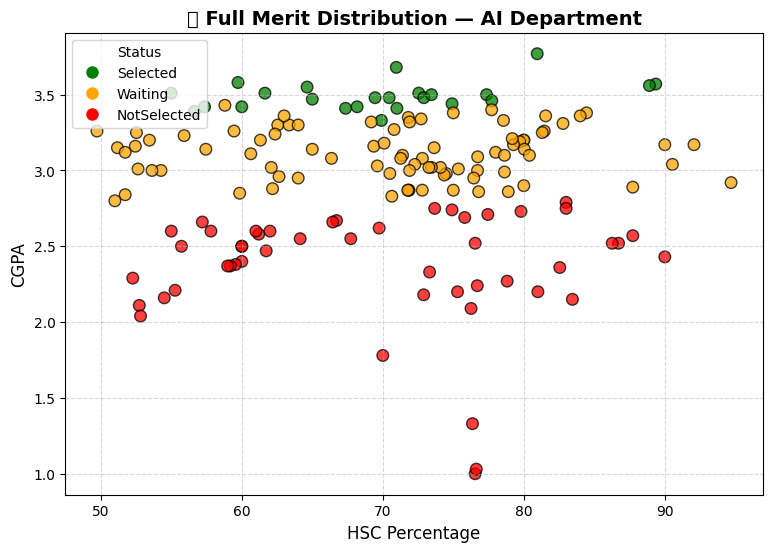

In [98]:
import matplotlib.pyplot as plt

# Define colors for all statuses
colors = {
    "Selected": "green",
    "Waiting": "orange",
    "NotSelected": "red"
}

# Keep only valid rows (non-empty Status)
df_viz = df[df["Status"].isin(colors.keys())].copy()

plt.figure(figsize=(9,6))
plt.scatter(df_viz["HSC%"], df_viz["Cgpa"],
            c=df_viz["Status"].map(colors),
            s=70, edgecolor="black", alpha=0.75)

plt.xlabel("HSC Percentage", fontsize=12)
plt.ylabel("CGPA", fontsize=12)
plt.title("📊 Full Merit Distribution — AI Department", fontsize=14, fontweight="bold")
plt.grid(True, linestyle="--", alpha=0.5)

# Create custom legend
handles = [plt.Line2D([0], [0], marker="o", color="w", label=key,
                      markerfacecolor=value, markersize=10)
           for key, value in colors.items()]
plt.legend(handles=handles, title="Status", loc="upper left")

plt.show()


# ***🎨 Step 8 — Predicted Waiting Outcomes***

In [99]:
# Count how many waiting students fall into each predicted category
prediction_counts = waiting_df["Prediction"].value_counts()

print("📈 Prediction Summary:")
print(prediction_counts)

# Optional: print with emojis for nicer output 😄
print(f"\n✅ Likely Selected: {prediction_counts.get('Likely Selected', 0)}")
print(f"❌ Not Likely: {prediction_counts.get('Not Likely', 0)}")


📈 Prediction Summary:
Prediction
Likely Selected    47
Not Likely         39
Name: count, dtype: int64

✅ Likely Selected: 47
❌ Not Likely: 39


# ***📊 Step 9 — Visualize Predicted Waiting Outcomes***

In [92]:
import numpy as np

if len(model.classes_) > 1:
    # If the model was trained on more than one class, calculate probability for the second class
    waiting_df["Selection_Probability"] = model.predict_proba(waiting_df[["HSC%", "Cgpa"]])[:, 1]
    waiting_df["Prediction"] = np.where(waiting_df["Selection_Probability"] > 0.6,
                                        "Likely Selected", "Not Likely")
else:
    # If the model was trained on only one class, assign that class as the prediction
    predicted_class = model.classes_[0]
    waiting_df["Selection_Probability"] = None # Or a placeholder like 'N/A'
    waiting_df["Prediction"] = predicted_class
    waiting_df["Prediction"] = waiting_df["Prediction"].map({1: "Likely Selected", 0: "Not Likely"})


print(waiting_df["Prediction"].value_counts())

Prediction
Likely Selected    47
Not Likely         39
Name: count, dtype: int64


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


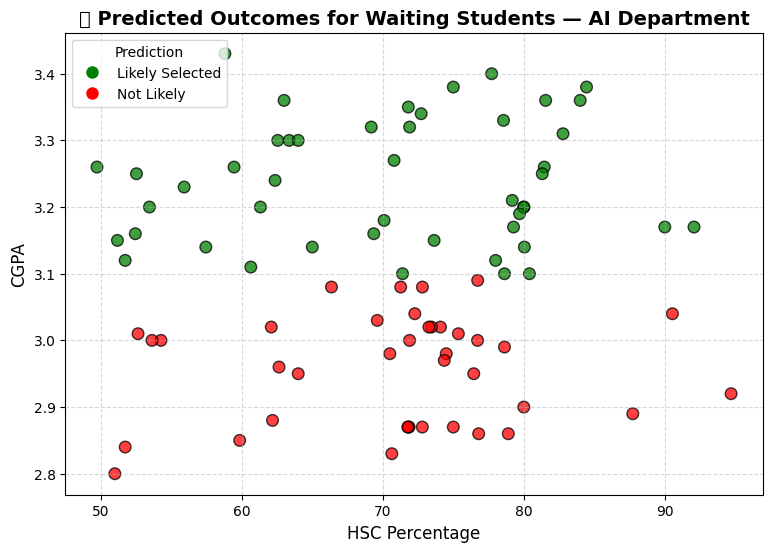

In [96]:
import matplotlib.pyplot as plt

# Define colors for the predictions
pred_colors = {
    "Likely Selected": "green",
    "Not Likely": "red"
}

# Ensure the waiting_df is not empty before plotting
if len(waiting_df) > 0 and "Prediction" in waiting_df.columns:
    plt.figure(figsize=(9, 6))

    # Filter out rows with NaN in 'Prediction' if any exist (though they shouldn't after prediction)
    waiting_viz = waiting_df.dropna(subset=['Prediction']).copy()

    # Plot the waiting students colored by their prediction
    plt.scatter(waiting_viz["HSC%"], waiting_viz["Cgpa"],
                c=waiting_viz["Prediction"].map(pred_colors),
                s=70, edgecolor="black", alpha=0.75)

    plt.xlabel("HSC Percentage", fontsize=12)
    plt.ylabel("CGPA", fontsize=12)
    plt.title("🔮 Predicted Outcomes for Waiting Students — AI Department", fontsize=14, fontweight="bold")
    plt.grid(True, linestyle="--", alpha=0.5)

    # Create custom legend
    handles = [plt.Line2D([0], [0], marker="o", color="w", label=key,
                          markerfacecolor=value, markersize=10)
               for key, value in pred_colors.items()]
    plt.legend(handles=handles, title="Prediction", loc="upper left")

    plt.show()
elif len(waiting_df) == 0:
    print("No waiting students to visualize.")
else:
    print("Prediction column not found in waiting_df. Please run the prediction step.")